<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/Marta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# title.akas.tsv.gz - Contains the following information for titles:
# titleId (string) - a tconst, an alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# title (string) – the localized title
# region (string) - the region for this version of the title
# language (string) - the language of the title
# types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
# attributes (array) - Additional terms to describe this alternative title, not enumerated
# isOriginalTitle (boolean) – 0: not original title; 1: original title

# Marta
# title.basics.tsv.gz - Contains the following information for titles:
# tconst (string) - alphanumeric unique identifier of the title
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
# originalTitle (string) - original title, in the original language
# isAdult (boolean) - 0: non-adult title; 1: adult title
# startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
# endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
# runtimeMinutes – primary runtime of the title, in minutes
# genres (string array) – includes up to three genres associated with the title

# Marta
# title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:
# tconst (string) - alphanumeric unique identifier of the title
# directors (array of nconsts) - director(s) of the given title
# writers (array of nconsts) – writer(s) of the given title

# title.episode.tsv.gz – Contains the tv episode information. Fields include:
# tconst (string) - alphanumeric identifier of episode
# parentTconst (string) - alphanumeric identifier of the parent TV Series
# seasonNumber (integer) – season number the episode belongs to
# episodeNumber (integer) – episode number of the tconst in the TV series

# title.principals.tsv.gz – Contains the principal cast/crew for titles
# tconst (string) - alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# nconst (string) - alphanumeric unique identifier of the name/person
# category (string) - the category of job that person was in
# job (string) - the specific job title if applicable, else '\N'
# characters (string) - the name of the character played if applicable, else '\N'

#self-category: 
# Appear in titles with the genre Documentary
# Appear in titles with the keyword TV-special (e.g. the Academy Awards ceremony broadcast)
# Appear in titles with the keyword non-fiction (e.g. Talk-Shows)
# Are credited as "himself, herself, self, themselves" (e.g. in Making-of featurettes or Reality TV)
# are displayed in a separate section called "Self" and other roles will appear in their respective groupings.

# title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
# tconst (string) - alphanumeric unique identifier of the title
# averageRating – weighted average of all the individual user ratings
# numVotes - number of votes the title has received

# name.basics.tsv.gz – Contains the following information for names:
# nconst (string) - alphanumeric unique identifier of the name/person
# primaryName (string)– name by which the person is most often credited
# birthYear – in YYYY format
# deathYear – in YYYY format if applicable, else '\N'
# primaryProfession (array of strings)– the top-3 professions of the person
# knownForTitles (array of tconsts) – titles the person is known for

In [33]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd drive/MyDrive

/content/drive/MyDrive


In [9]:
#IMDB_name.basics
name_basics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/name.basics.tsv.gz', compression = 'gzip', sep = '\t')
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0054452,tt0056404,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0069467,tt0050986,tt0083922"
...,...,...,...,...,...,...
12005700,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt14069590,tt11657662"
12005701,nm9993716,Essias Loberg,\N,\N,NaN,\N
12005702,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
12005703,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [5]:
#IMDB_title.basics
title_basics01 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title.basics.tsv.gz', compression = 'gzip', sep = '\t')
title_basics01

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,\N
...,...,...,...,...,...,...,...,...,...
9301897,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,\N
9301898,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,\N
9301899,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,\N
9301900,tt9916856,short,The Wind,The Wind,0,2015,\N,27,\N


In [6]:
title_basics01.to_pickle("title_basics_p.pickle")

In [7]:
title_basics = pd.read_pickle("title_basics_p.pickle")

In [ ]:
#Checks about tconts from title_basics in name_basics are ok
condition = name_basics['tconst'] == 'tt0000001'
condition.unique()

In [6]:
#IMDB_title.akas
title_akas01 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title.akas.tsv.gz', compression = 'gzip', sep = '\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
title_akas01.to_pickle("title_akas_p.pickle")


In [8]:
title_akas = pd.read_pickle("title_akas_p.pickle")

In [ ]:
#IMDB_title.crew
title_crew = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title.crew.tsv.gz', compression = 'gzip', sep = '\t')
title_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
9301897,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9301898,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9301899,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9301900,tt9916856,nm10538645,nm6951431


In [ ]:
#IMDB_title.episode
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title.episode.tsv.gz', compression = 'gzip', sep = '\t')

In [ ]:
#IMDB_title.principals
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title.principals.tsv.gz', compression = 'gzip', sep = '\t')

In [ ]:
#IMDB_title.ratings
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title.ratings.tsv.gz', compression = 'gzip', sep = '\t')

## Know the data

# M1) title_basics

In [ ]:
#Check the types of variables and null values
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9301902 entries, 0 to 9301901
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 638.7+ MB


In [ ]:
# object ok = tconst, titleTyoe, primaryTitle, originalTitle

# isAdult: is bool, check if there are only 0 and 1

# runtimeMinutes : should be int

In [8]:
#TODO=: convert runtimeminutes to int??
type(title_basics['runtimeMinutes'][0]) -> str

str

In [ ]:
#check which variables the isAdult column has
title_basics['isAdult'].unique()

array([0, 1, 2019, 1981, 2020, 2017, '0', '1', '\\N', 2014, 2005],
      dtype=object)

In [ ]:
#check which variables the isAdult column has and count them
title_basics['isAdult'].value_counts()

0       8949785
1        286572
0         63380
1          2155
2019          3
2020          2
1981          1
2017          1
\N            1
2014          1
2005          1
Name: isAdult, dtype: int64

In [ ]:
#countercheck
condition = title_basics['isAdult'] == 2019
condition.unique()

In [ ]:
# go to imbd site and check what happens in theses tv episodes: 
condition = title_basics['isAdult'] == 2019
title_basics.loc[condition]

# Answer:
# it's the year when they aired the episode for 2020, 2019, 1981, 2017, 2014, 2005

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1097688,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,\N,NaN
1509018,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,\N,NaN
9258502,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN


In [21]:
#check if other tv episodes show the date as start year or if they are //N 
condition = title_basics['titleType'] == 'tvEpisode'
title_basics.loc[condition]

title_basics['startYear'].loc[condition].value_counts()
#title_basics['endYear'].loc[condition].value_counts()

#The startyear column has 1105935 /N for the titletype = tv episodes
#The endyear column is empty for all the titletype = tv episodes


\N      1105935
2021     347755
2018     320920
2017     317262
2019     316116
         ...   
1907          1
1908          1
1912          1
1913          1
1914          1
Name: startYear, Length: 117, dtype: int64

In [ ]:
#TODO replace the years checked in the startYear column

In [ ]:
condition = title_basics['isAdult'] == 0 | 1
title_basics.loc[condition]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
59139,tt0060313,movie,"Dingle, Dangle","Dingle, Dangle",1,1966,\N,61,\N
60703,tt0061926,movie,Lust Weekend,Lust Weekend,1,1967,\N,70,\N
61119,tt0062361,movie,Thigh Spy,Thigh Spy,1,1967,\N,70,\N
61174,tt0062417,movie,Un épais manteau de sang,Un épais manteau de sang,1,1968,\N,88,\N
61478,tt0062727,short,Of Special Merit,Besonders wertvoll,1,1968,\N,11,\N
...,...,...,...,...,...,...,...,...,...
9301376,tt9915710,video,Sodomizer 5,Sodomizer 5,1,1996,\N,85,\N
9301401,tt9915772,tvEpisode,Cassidy Banks loves the Hitachi Wand,Cassidy Banks loves the Hitachi Wand,1,\N,\N,\N,\N
9301405,tt9915788,tvEpisode,Teen travel mates hot fucking,Teen travel mates hot fucking,1,\N,\N,\N,\N
9301614,tt9916254,video,Big Tit Cream Pie 32,Big Tit Cream Pie 32,1,2015,\N,226,\N


In [ ]:
condition = title_basics['isAdult'] == '0'
title_basics.loc[condition]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2949120,tt13607682,tvEpisode,Episode #1.973,Episode #1.973,0,\N,\N,\N,\N
2949121,tt13607684,tvEpisode,Episode #1.975,Episode #1.975,0,\N,\N,\N,\N
2949122,tt13607686,tvEpisode,Episode #1.976,Episode #1.976,0,\N,\N,\N,\N
2949123,tt13607688,tvEpisode,Episode #1.977,Episode #1.977,0,\N,\N,\N,\N
2949124,tt1360768,movie,David Farrell: Elusive Moments,David Farrell: Elusive Moments,0,2008,\N,65,\N
...,...,...,...,...,...,...,...,...,...
3014651,tt13729658,tvEpisode,Vvedenie,Vvedenie,0,2021,\N,54,\N
3014652,tt1372965,tvEpisode,Episode dated 3 February 2009,Episode dated 3 February 2009,0,2009,\N,\N,\N
3014653,tt13729660,tvEpisode,Karma,Karma,0,2021,\N,\N,\N
3014654,tt13729662,tvMovie,Kennzeichen DAH - Kainszeichen Dachau,Kennzeichen DAH - Kainszeichen Dachau,0,1971,\N,45,\N


In [ ]:
#check value_counts other columns
#total entries: 9301902

title_basics['tconst'].nunique()
#9301902

#Are there any /N values?
condition = title_basics['tconst'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: 0

0

In [8]:
title_basics_count = title_basics['titleType'].value_counts()
title_basics_count
#11 unique values
# how many rows I can use from the dataset (are they usable)? are the other values /N?

tvEpisode       7018334
short            894908
movie            624333
video            266185
tvSeries         232702
tvMovie          137978
tvMiniSeries      45579
tvSpecial         38677
videoGame         32504
tvShort           10700
tvPilot               2
Name: titleType, dtype: int64

In [ ]:
title_basics['primaryTitle'].nunique()
#4262092 unique values
#some are repeated

#Are there any /N values?
condition = title_basics['primaryTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: No

0

In [ ]:
title_basics['originalTitle'].nunique()
# 4282726 unique values (more 2634 than the primary title)
# some are repeated

# #Are there any /N values?
condition = title_basics['originalTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
# Answer: No

0

In [ ]:
title_basics['startYear'].value_counts()
# we have \N = 1243835 entries

\N      1243835
2021     433562
2018     423498
2017     420297
2019     411958
         ...   
1882          2
1881          2
1874          1
1883          1
1885          1
Name: startYear, Length: 151, dtype: int64

In [ ]:
title_basics['endYear'].value_counts()
# we have \N = 9204461 entries out of 9301902, which means that only 97441 values are non-null which is only 1% ----- check if this is the same number as episodes

\N      9204461
2017       5971
2018       5903
2019       5821
2020       5373
         ...   
1944          1
1906          1
1925          1
1934          1
1935          1
Name: endYear, Length: 98, dtype: int64

In [ ]:
title_basics['endYear'].apply(lambda x : '1' if x == r'\N' else 0).sum()

0

In [ ]:
TVseries = title_basics['titleType'] == 'tvEpisode'
TVseries.sum()
#there are 7018334 TVepisodes on the title_basics collumn

7018334

In [ ]:
TVseries =  (title_basics['titleType'] == 'tvEpisode') & (title_basics['endYear'] == r'\N')
TVseries.sum()

7018334

In [ ]:
check = (title_basics['endYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

tconst            7018334
titleType         7018334
primaryTitle      7018323
originalTitle     7018323
isAdult           7018334
startYear         7018334
endYear           7018334
runtimeMinutes    7018334
genres            7018324
dtype: int64

In [ ]:
check = (title_basics['startYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

tconst            1105935
titleType         1105935
primaryTitle      1105932
originalTitle     1105932
isAdult           1105935
startYear         1105935
endYear           1105935
runtimeMinutes    1105935
genres            1105925
dtype: int64

In [ ]:
# # on isAdult column - change all other than 0 and 1 to null

# def check_safety(rating):
#   safe_for_children = ''
#   if rating == 'G':
#     safe_for_children = 'yes'
#   else:
#     safe_for_children = 'no' 
#   return safe_for_children

# movies['safe_for_children'] = movies['content_rating'].apply(check_safety)
# movies.head()


In [ ]:
#There are no values on genres
title_basics['genres'].value_counts()

\N    9301892
Name: genres, dtype: int64

In [9]:
condition = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']] == r'\N'
condition_pivot = condition.pivot_table(values = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']], index = title_basics['titleType'], aggfunc = 'sum')
condition_pivot['total'] = title_basics['titleType'].value_counts()
condition_pivot

,endYear,genres,isAdult,runtimeMinutes,startYear,total
titleType,,,,,,
movie,624333,624333,0,230319,83857,624333
short,894908,894908,0,315264,27160,894908
tvEpisode,7018334,7018324,1,5897812,1105935,7018334
tvMiniSeries,24465,45579,0,28821,2933,45579
tvMovie,137978,137978,0,44524,3701,137978
tvPilot,2,2,0,2,0,2
tvSeries,156376,232702,0,140798,17967,232702
tvShort,10700,10700,0,1256,97,10700
tvSpecial,38676,38677,0,20154,236,38677


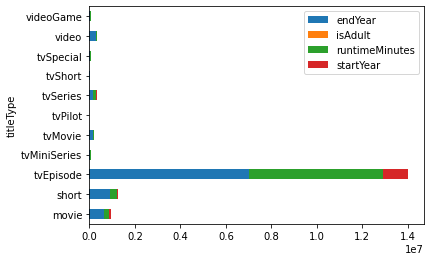

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.barplot(data=condition_pivot, x = 'titleType')
# plt.show()

ax = condition_pivot.plot(kind='barh', stacked=True)

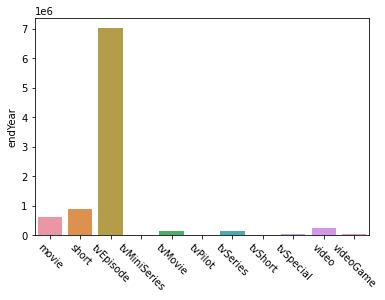

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,6))
ax = sns.barplot(x = condition_pivot.index.values, y = condition_pivot['endYear'], data = condition_pivot)
ax = sns.barplot(x = )
ax.tick_params(axis='x', rotation=-45)

# M2) Tile crew

In [ ]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9301902 entries, 0 to 9301901
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 212.9+ MB


# M3) Akas

In [9]:
title_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
33503602,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
33503603,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
33503604,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
33503605,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [15]:
condition1 = title_akas[['region', 'language']] != r'\N'
condition1_pivot = condition1.pivot_table(values = title_akas[['region', 'language']], index = title_akas['titleId'], aggfunc = 'count')
condition1_pivot['total'] = title_akas['titleId'].value_counts()
condition1_pivot

,language,region,total
titleId,,,
tt0000001,8,8,8
tt0000002,8,8,8
tt0000003,9,9,9
tt0000004,8,8,8
tt0000005,12,12,12
...,...,...,...
tt9916846,7,7,7
tt9916848,7,7,7
tt9916850,7,7,7


#TOP's

## 1) Year analysis

In [82]:
condition_ms = title_basics.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
#condition_ms
years_pivot = condition_ms.pivot_table(values = 'tconst', index = 'startYear', aggfunc = 'count')
years_pivot = years_pivot.rename(columns={'tconst' : 'n_entries'})
years_pivot

# years_pivot_res = years_pivot.reset_index()
# years_pivot_res

#first movie/short = 1874 on IMDB (is a percussor, because public screening of ten of the Lumière brothers' short films in Paris on 28 December 1895 can be regarded as the breakthrough of projected cinematographic motion pictures.)

,startYear,n_entries
0,1874,1
1,1877,4
2,1878,2
3,1881,2
4,1882,2
...,...,...
138,2018,69643
139,2019,65224
140,2020,59115
141,2021,56372


In [88]:
check = years_pivot['n_entries'] == years_pivot['n_entries'].max()
years_pivot.loc[check]

,n_entries
startYear,
2017,70679


[Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')]

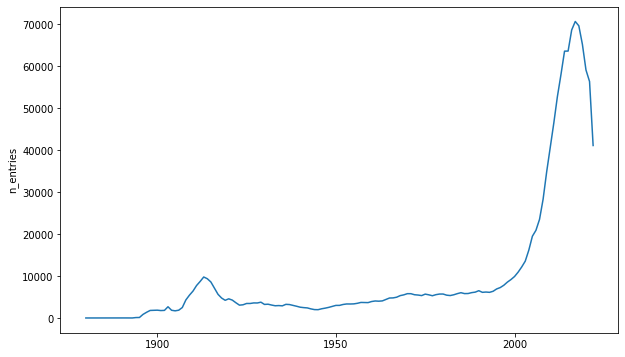

In [51]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = years_pivot, x = years_pivot.index.values, y = 'n_entries')
plt.xticks(['1900', '1950', '2000'])

## 2) Top rated movies